for refrence: https://pylessons.com/YOLOv3-TF2-DeepSort

In [ ]:
!pip install ultralytics
!pip install deep-sort-realtime
!apt-get install ffmpeg

In [ ]:
import os
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from deep_sort_realtime.deepsort_tracker import DeepSort
from collections import defaultdict
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
ROOT_DIR = '/content/gdrive/MyDrive/data'

In [ ]:
model_path = os.path.join(ROOT_DIR, 'results_on_100_epochs', 'runs', 'detect', 'train', 'weights', 'best.pt')
model = YOLO(model_path)

In [ ]:
tracker = DeepSort(max_age=15)

In [ ]:
video_path = os.path.join(ROOT_DIR, 'dfgdfgfdg_001.mp4')
video_path_out = os.path.join(ROOT_DIR, 'output_video', 'dfgdfgfdg_001.avi')

print(tracking_list)

In [ ]:
grouped_dict = defaultdict(list)
for item in tracking_list:
    string_value, values = item
    grouped_dict[string_value].append(values)

# Convert the defaultdict to a list of lists
grouped_list = [[key, values] for key, values in grouped_dict.items()]

In [ ]:
filtered_list = [item for item in grouped_list if len(item[1]) >= int(total_frames)/18]

In [ ]:
filtered_list[1][0]

'10'

In [ ]:
cordinate_list = [item[0] for item in filtered_list[1][1]]
x_cord = [width-item[0] for item in cordinate_list]
y_cord = [height-item[1] for item in cordinate_list]
coordinates_2D = np.column_stack((x_cord, y_cord))

In [ ]:
len(x_cord)

92

In [ ]:
dx = np.diff(coordinates_2D[:, 0])
dy = np.diff(coordinates_2D[:, 1])

angles_x = np.arctan2(dy, dx)
angles_y = np.arctan2(dx, dy)

angles_x_deg = np.degrees(angles_x)
angles_y_deg = np.degrees(angles_y)

avg_angle_x = np.mean(angles_x_deg)
avg_angle_y = np.mean(angles_y_deg)

print(f"Average angle with x-axis: {avg_angle_x} degrees")
print(f"Average angle with y-axis: {avg_angle_y} degrees")

Average angle with x-axis: -41.697015481888386 degrees
Average angle with y-axis: 24.883828668701575 degrees


In [ ]:
angle_x = list(angles_x_deg)
for i in range(len(angle_x)):
  if angle_x[i] < 0:
    angle_x[i] = 180 - abs(angle_x[i])
  else:
    continue

In [ ]:
len(angle_x)

91

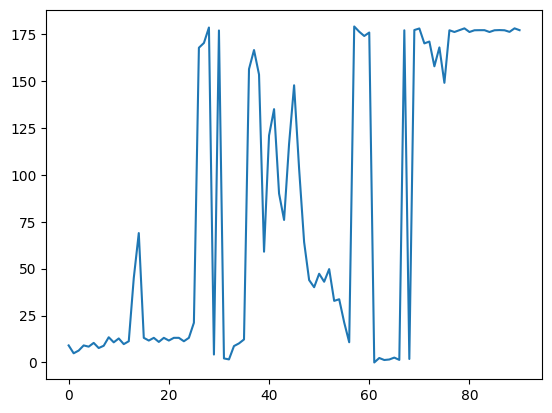

In [ ]:
plt.plot(range(len(list(angles_x_deg))), angle_x)

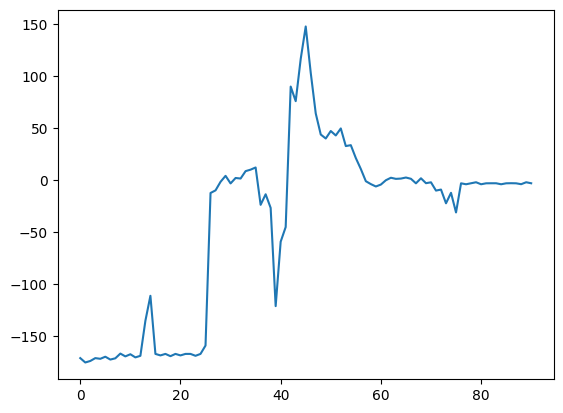

In [ ]:
list(angles_x_deg)
plt.plot(range(len(list(angles_x_deg))), list(angles_x_deg))

In [ ]:
coordinates_2D.shape

(66, 2)

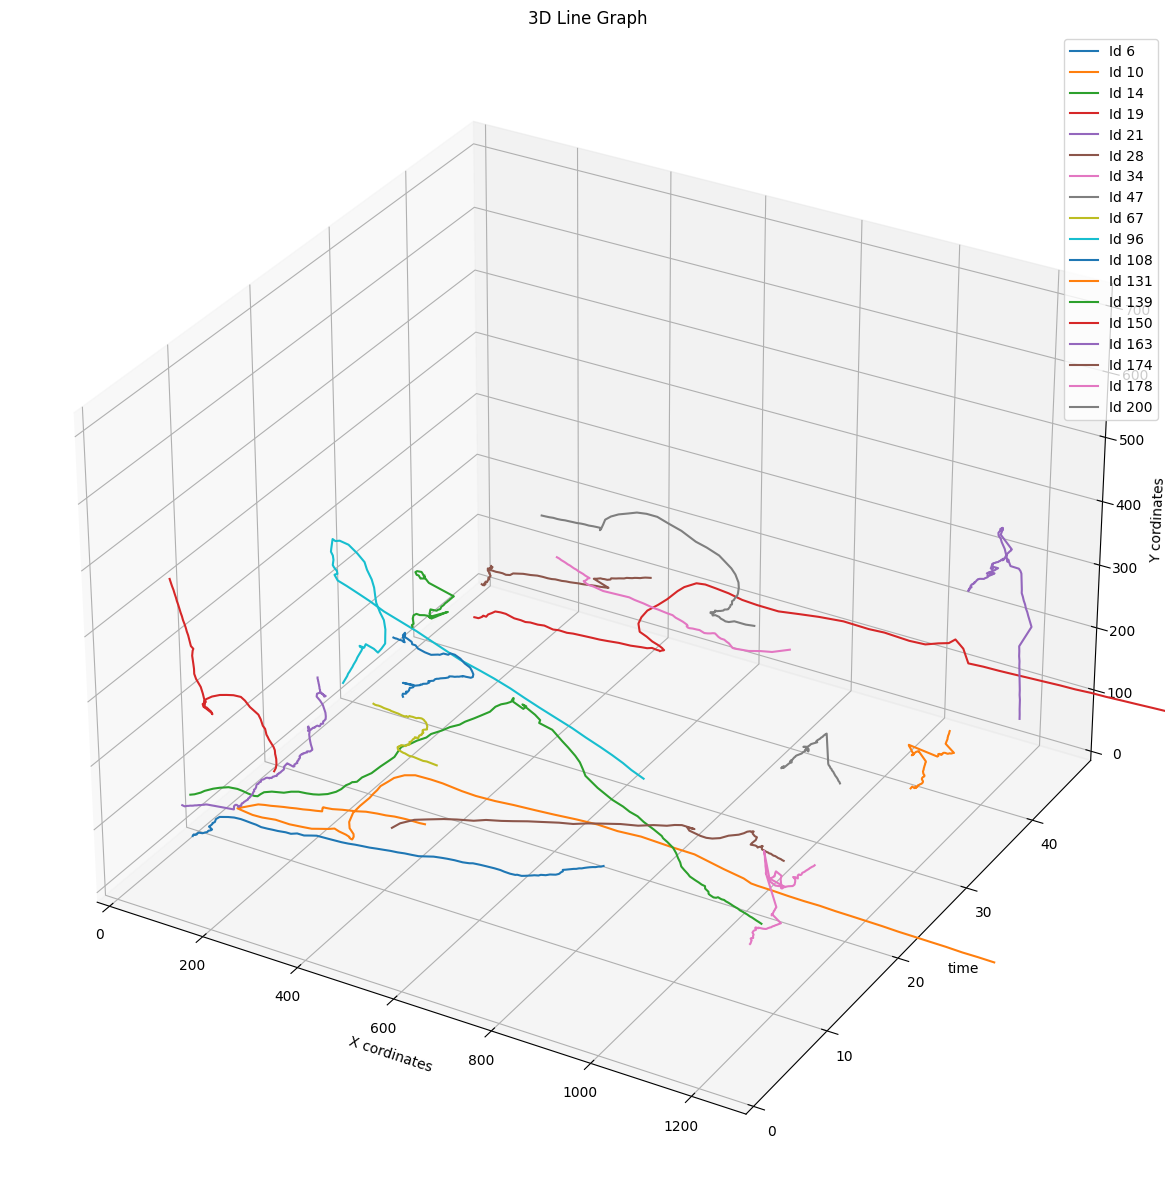

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')


for i in range(len(filtered_list)):

  tracking_id_list = [item[0] for item in filtered_list[i][1]]

  x_cord = [width-item[0] for item in tracking_id_list]

  y_cord = [height-item[1] for item in tracking_id_list]

  time = [item[1] for item in filtered_list[i][1]]

  ax.plot(x_cord, time, y_cord, label = f'Id {filtered_list[i][0]}')

ax.set_xlabel('X cordinates')
ax.set_ylabel('time')
ax.set_zlabel('Y cordinates')
ax.set_title('3D Line Graph')

ax.set_xlim(0, width)
ax.set_ylim(0, total_frames/(fps*2))
ax.set_zlim(0, height)

ax.legend()

# Show the plot
plt.show()

In [ ]:
import numpy as np

# Sample list of (x, y) coordinates
coordinates = [
    (1, 3),
    (3, 2),
    (5, 10),
]

# Convert coordinates to numpy array for easy computation
coords_array = np.array(coordinates)

# Calculate differences between consecutive points to find the changes in x and y
dx = np.diff(coords_array[:, 0])
dy = np.diff(coords_array[:, 1])

# Calculate angles with respect to the x-axis and y-axis
angles_x = np.arctan2(dy, dx)  # Angle with respect to x-axis
angles_y = np.arctan2(dx, dy)  # Angle with respect to y-axis

# Convert angles from radians to degrees for better readability
angles_x_deg = np.degrees(angles_x)
angles_y_deg = np.degrees(angles_y)

# Calculate average angles
avg_angle_x = np.mean(angles_x_deg)
avg_angle_y = np.mean(angles_y_deg)

print(f"Average angle with x-axis: {avg_angle_x} degrees")
print(f"Average angle with y-axis: {avg_angle_y} degrees")


Average angle with x-axis: 24.69935267749777 degrees
Average angle with y-axis: 65.30064732250223 degrees


In [ ]:
print(coords_array.shape)

(3, 2)
